In [5]:
with open("./data/file_with_threshold_and_scores.txt", 'r') as f:
   data = eval(f.readline())


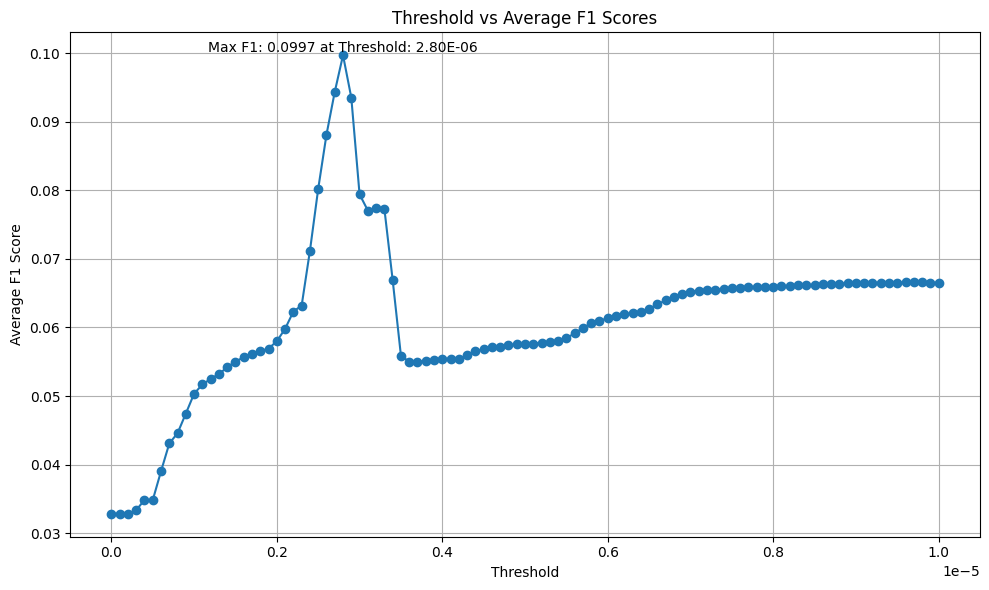

In [12]:
import matplotlib.pylab as plt

avg_f1_scores_by_threshold = {}

for attack_type, values in data:
     for key, metrics in values.items():
         if key in avg_f1_scores_by_threshold.keys():
            avg_f1_scores_by_threshold[key] += metrics[3]
         else:
             avg_f1_scores_by_threshold[key] = metrics[3]

for key in avg_f1_scores_by_threshold:
    avg_f1_scores_by_threshold[key] = avg_f1_scores_by_threshold[key] / len(data)
    

thresholds = list(avg_f1_scores_by_threshold.keys())
average_f1_scores = list(avg_f1_scores_by_threshold.values())

max_f1_score = max(average_f1_scores)
max_index = average_f1_scores.index(max_f1_score)
max_threshold = thresholds[max_index]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, average_f1_scores, marker='o')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.text(max_threshold, max_f1_score, f'   Max F1: {max_f1_score:.4f} at Threshold: {max_threshold:.2E}', ha='left', va='bottom')


plt.xlabel('Threshold')
plt.ylabel('Average F1 Score')
plt.title('Threshold vs Average F1 Scores')
plt.grid(True)
plt.tight_layout()
plt.show()

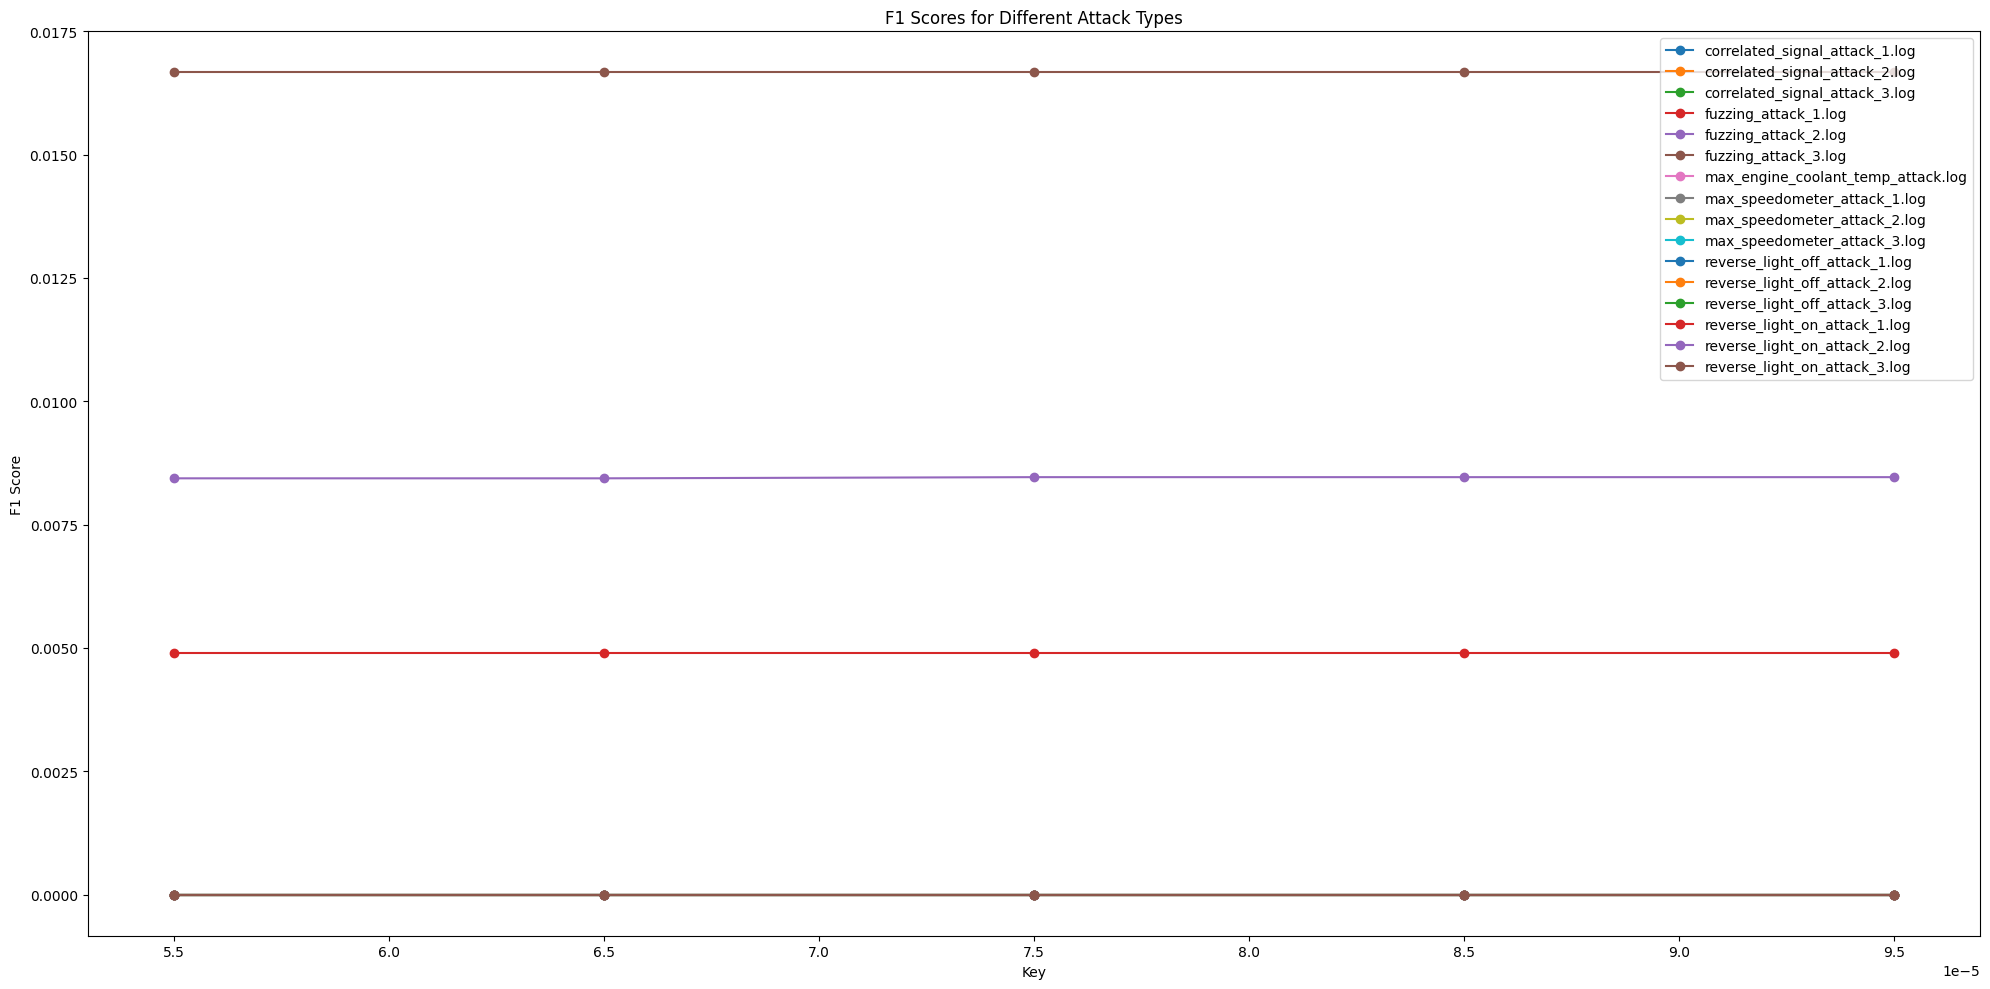

In [2]:
import matplotlib.pyplot as plt

avg_f1_scores_by_threshold = {}

for attack_type, values in data:
     for key, metrics in values.items():
         if avg_f1_scores_by_threshold[key]:
            avg_f1_scores_by_threshold[key] += metrics[3]
         else:
             avg_f1_scores_by_threshold[key] = metrics[3]
         
for attack_type, values in data:
    for key, metrics in values.items():
        f1_score = metrics[3]  # Extracting the F1 score
        if attack_type not in f1_scores_by_attack:
            f1_scores_by_attack[attack_type] = []
        f1_scores_by_attack[attack_type].append((key, f1_score))

# Plotting the F1 scores for each attack type
plt.figure(figsize=(20, 10))

for attack, scores in f1_scores_by_attack.items():
    keys = [score[0] for score in scores]
    f1_scores = [score[1] for score in scores]
    plt.plot(keys, f1_scores, marker='o', label=attack)

plt.xlabel('Key')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Attack Types')
plt.legend()
plt.tight_layout()
plt.show()
